In [1]:
#Problem Statement : Derive Forward Kinematics for #R non planer Manipulator
#position of end Effector and  joints , Jw , Jv are express in frame 0

In [2]:
import numpy as np 
import math as m
import sympy  as sy

# Helper Function

In [3]:
class helper():
    def __init__ (self):
        self.id = 0
    @staticmethod
    def transform( lst ):
        a ,alpha, d , theta = lst[0],lst[1],lst[2],lst[3]
        alpha , theta = m.radians(alpha) , m.radians(theta)
        T = np.array ([ [ m.cos(theta)              , -1*m.sin(theta)           ,      0          ,    a              ],
                        [ m.sin(theta)*m.cos(alpha) , m.cos(theta)*m.cos(alpha) , -1*m.sin(alpha) , -1*m.sin(alpha)*d ],
                        [ m.sin(theta)*m.sin(alpha) , m.cos(theta)*m.sin(alpha) ,    m.cos(alpha) ,    m.cos(alpha)*d ],
                        [ 0                         , 0                         ,    0            ,  1                ]])
        return np.round(T, 3)
    
    @staticmethod 
    def sym_transform(lst):
        a ,alpha, d , theta = lst[0],lst[1],lst[2],lst[3]
        alpha , theta = m.radians(alpha) , m.radians(theta)
        T = sy.Matrix([ [ sy.cos(theta)              , -1*sy.sin(theta)           ,      0          ,    a              ],
                        [ sy.sin(theta)*sy.cos(alpha) , sy.cos(theta)*sy.cos(alpha) , -1*sy.sin(alpha) , -1*sy.sin(alpha)*d ],
                        [ sy.sin(theta)*sy.sin(alpha) , sy.cos(theta)*sy.sin(alpha) ,    sy.cos(alpha) ,    sy.cos(alpha)*d ],
                        [ 0                         , 0                         ,    0            ,  1                ]])
        return T
        
    @staticmethod 
    def sym_transform(a ,alpha, d , theta):
       
#         alpha , theta = m.radians(alpha) , m.radians(theta)
        T = sy.Matrix([ [ sy.cos(theta)              , -1*sy.sin(theta)           ,      0          ,    a              ],
                        [ sy.sin(theta)*sy.cos(alpha) , sy.cos(theta)*sy.cos(alpha) , -1*sy.sin(alpha) , -1*sy.sin(alpha)*d ],
                        [ sy.sin(theta)*sy.sin(alpha) , sy.cos(theta)*sy.sin(alpha) ,    sy.cos(alpha) ,    sy.cos(alpha)*d ],
                        [ 0                         , 0                         ,    0            ,  1                ]])
        return T
        

# Declering the symbols for joints and link lengths

In [4]:
theta1 = sy.Symbol('theta1')
theta2 = sy.Symbol('theta2')
theta3 = sy.Symbol('theta3')

In [54]:
t1_dot = sy.Symbol('thetadot1')
t2_dot = sy.Symbol('thetadot2')
t3_dot = sy.Symbol('thetadot3')

t1_d_d = sy.Symbol('thetadotdot1')
t2_d_d = sy.Symbol('thetadotdot2')
t3_d_d = sy.Symbol('thetadotdot3')

In [5]:
Length_link_1 = sy.Symbol('L1')
Length_link_2 = sy.Symbol('L2')
Length_link_3 = sy.Symbol('L3')

In [44]:
mass = sy.symbols('m')
h = sy.symbols('h') # width of  link
g = sy.symbols('g')

#  Delcering the D_H parameter Matrix  (Useless)

In [7]:
D_H_parametrs = sy.Matrix([[0,0,0,theta1],[Length_link_1,-90,0,theta2],[Length_link_2,-90,0,theta3] , [Length_link_3,0,0,0]])

# Calculating the transformation Matrix 

In [8]:
# from fame 0 to 1
T01 = helper.sym_transform(0,0,0,theta1)
T01

Matrix([
[cos(theta1), -sin(theta1), 0, 0],
[sin(theta1),  cos(theta1), 0, 0],
[          0,            0, 1, 0],
[          0,            0, 0, 1]])

In [9]:
# from fame 1 to 2
T12 = helper.sym_transform(Length_link_1,-sy.pi/2,0,theta2).evalf()
T12

Matrix([
[ cos(theta2), -sin(theta2),   0,  L1],
[           0,            0, 1.0,   0],
[-sin(theta2), -cos(theta2),   0,   0],
[           0,            0,   0, 1.0]])

In [10]:
# from fame 0 to 2
T02 = T01 * T12
T02

Matrix([
[cos(theta1)*cos(theta2), -sin(theta2)*cos(theta1), -1.0*sin(theta1), L1*cos(theta1)],
[sin(theta1)*cos(theta2), -sin(theta1)*sin(theta2),  1.0*cos(theta1), L1*sin(theta1)],
[           -sin(theta2),             -cos(theta2),                0,              0],
[                      0,                        0,                0,            1.0]])

In [11]:
# from fame 2 to 3
T23 = helper.sym_transform(Length_link_2,-sy.pi/2,0,theta3).evalf()
T23

Matrix([
[ cos(theta3), -sin(theta3),   0,  L2],
[           0,            0, 1.0,   0],
[-sin(theta3), -cos(theta3),   0,   0],
[           0,            0,   0, 1.0]])

In [12]:
# from fame 3 to 4
T34 = helper.sym_transform(Length_link_3,0,0,0).evalf()
T34

Matrix([
[1.0,   0,   0,  L3],
[  0, 1.0,   0,   0],
[  0,   0, 1.0,   0],
[  0,   0,   0, 1.0]])

In [13]:
# from fame 0 to 3
T03 = T02*T23
T03

Matrix([
[1.0*sin(theta1)*sin(theta3) + cos(theta1)*cos(theta2)*cos(theta3),  1.0*sin(theta1)*cos(theta3) - sin(theta3)*cos(theta1)*cos(theta2), -1.0*sin(theta2)*cos(theta1), 1.0*L1*cos(theta1) + L2*cos(theta1)*cos(theta2)],
[sin(theta1)*cos(theta2)*cos(theta3) - 1.0*sin(theta3)*cos(theta1), -sin(theta1)*sin(theta3)*cos(theta2) - 1.0*cos(theta1)*cos(theta3), -1.0*sin(theta1)*sin(theta2), 1.0*L1*sin(theta1) + L2*sin(theta1)*cos(theta2)],
[                                         -sin(theta2)*cos(theta3),                                            sin(theta2)*sin(theta3),             -1.0*cos(theta2),                                 -L2*sin(theta2)],
[                                                                0,                                                                  0,                            0,                                             1.0]])

In [14]:
# from fame 0 to 4
T04 = T03*T34
T04

Matrix([
[1.0*sin(theta1)*sin(theta3) + 1.0*cos(theta1)*cos(theta2)*cos(theta3),  1.0*sin(theta1)*cos(theta3) - 1.0*sin(theta3)*cos(theta1)*cos(theta2), -1.0*sin(theta2)*cos(theta1), 1.0*L1*cos(theta1) + 1.0*L2*cos(theta1)*cos(theta2) + L3*(1.0*sin(theta1)*sin(theta3) + cos(theta1)*cos(theta2)*cos(theta3))],
[1.0*sin(theta1)*cos(theta2)*cos(theta3) - 1.0*sin(theta3)*cos(theta1), -1.0*sin(theta1)*sin(theta3)*cos(theta2) - 1.0*cos(theta1)*cos(theta3), -1.0*sin(theta1)*sin(theta2), 1.0*L1*sin(theta1) + 1.0*L2*sin(theta1)*cos(theta2) + L3*(sin(theta1)*cos(theta2)*cos(theta3) - 1.0*sin(theta3)*cos(theta1))],
[                                         -1.0*sin(theta2)*cos(theta3),                                            1.0*sin(theta2)*sin(theta3),             -1.0*cos(theta2),                                                                             -1.0*L2*sin(theta2) - L3*sin(theta2)*cos(theta3)],
[                                                                    0,                 

# Caalculating the positions for end effector  and joints

In [15]:
position_end_effector = T04[:3,3]
position_joint_3 = T03[:3,3]
position_joint_2 = T02[:3,3]
position_joint_1 = T01[:3,3]

# Initial Position Of End Effector

In [16]:
position_end_effector.subs({ Length_link_1:1,Length_link_2:1 ,Length_link_3:1,theta1:0.785,theta2:0.785,theta3:0.785 })

Matrix([
[  2.0613640598376],
[ 1.06051920354382],
[-1.20682502257128]])

# Position of End Effector In terms of Variables

In [17]:
T04[:3,3]

Matrix([
[1.0*L1*cos(theta1) + 1.0*L2*cos(theta1)*cos(theta2) + L3*(1.0*sin(theta1)*sin(theta3) + cos(theta1)*cos(theta2)*cos(theta3))],
[1.0*L1*sin(theta1) + 1.0*L2*sin(theta1)*cos(theta2) + L3*(sin(theta1)*cos(theta2)*cos(theta3) - 1.0*sin(theta3)*cos(theta1))],
[                                                                            -1.0*L2*sin(theta2) - L3*sin(theta2)*cos(theta3)]])

# Jacobian Matrix for Angular motion of End effector in frame 0

In [18]:
Jw = sy.Matrix([ list(T02[:3,2]) , list(T03[:3,2]) , list(T04[:3,2]) ])
Jw 

Matrix([
[            -1.0*sin(theta1),              1.0*cos(theta1),                0],
[-1.0*sin(theta2)*cos(theta1), -1.0*sin(theta1)*sin(theta2), -1.0*cos(theta2)],
[-1.0*sin(theta2)*cos(theta1), -1.0*sin(theta1)*sin(theta2), -1.0*cos(theta2)]])

# Jacobian Matrix for Linear motion of End effector in frame 0

In [19]:
Jv = sy.Matrix([ list(sy.diff(T04[:3,3],theta1)) , list(sy.diff(T04[:3,3],theta2)) , list(sy.diff(T04[:3,3],theta3)) ])
Jv

Matrix([
[-1.0*L1*sin(theta1) - 1.0*L2*sin(theta1)*cos(theta2) + L3*(-sin(theta1)*cos(theta2)*cos(theta3) + 1.0*sin(theta3)*cos(theta1)), 1.0*L1*cos(theta1) + 1.0*L2*cos(theta1)*cos(theta2) + L3*(1.0*sin(theta1)*sin(theta3) + cos(theta1)*cos(theta2)*cos(theta3)),                                                0],
[                                                      -1.0*L2*sin(theta2)*cos(theta1) - L3*sin(theta2)*cos(theta1)*cos(theta3),                                                     -1.0*L2*sin(theta1)*sin(theta2) - L3*sin(theta1)*sin(theta2)*cos(theta3), -1.0*L2*cos(theta2) - L3*cos(theta2)*cos(theta3)],
[                                                        L3*(1.0*sin(theta1)*cos(theta3) - sin(theta3)*cos(theta1)*cos(theta2)),                                                      L3*(-sin(theta1)*sin(theta3)*cos(theta2) - 1.0*cos(theta1)*cos(theta3)),                       L3*sin(theta2)*sin(theta3)]])

In [20]:
print(position_end_effector[2])

-1.0*L2*sin(theta2) - L3*sin(theta2)*cos(theta3)


In [21]:
x = sy.Symbol('x')
y = sy.Symbol('y')
z = sy.Symbol('z')

In [22]:
loss=((position_end_effector[0]-x)**2 + (position_end_effector[1]-y)**2 + (position_end_effector[2] - z)**2 )

In [23]:
values = { Length_link_1:1,Length_link_2:1 ,Length_link_3:1,theta1:0.1,theta2:0.1,theta3:0.1,x:2,y:1,z:1}

In [24]:
loss.subs(values)

3.04071011202253

In [25]:
print(loss.diff(theta3))

2*L3*(1.0*sin(theta1)*cos(theta3) - sin(theta3)*cos(theta1)*cos(theta2))*(1.0*L1*cos(theta1) + 1.0*L2*cos(theta1)*cos(theta2) + L3*(1.0*sin(theta1)*sin(theta3) + cos(theta1)*cos(theta2)*cos(theta3)) - x) + 2*L3*(-sin(theta1)*sin(theta3)*cos(theta2) - 1.0*cos(theta1)*cos(theta3))*(1.0*L1*sin(theta1) + 1.0*L2*sin(theta1)*cos(theta2) + L3*(sin(theta1)*cos(theta2)*cos(theta3) - 1.0*sin(theta3)*cos(theta1)) - y) + 2*L3*(-1.0*L2*sin(theta2) - L3*sin(theta2)*cos(theta3) - z)*sin(theta2)*sin(theta3)


In [26]:
des = [0.7851525817775801, -0.5004740569005929, -0.0006721166941442286]
values = { Length_link_1:1,Length_link_2:1 ,Length_link_3:1,theta1:des[0],theta2:des[1],theta3:des[2],x:2,y:1,z:1}

In [27]:
x1,y1,z1 = position_joint_1.subs(values)
x2,y2,z2 = position_joint_2.subs(values)
x3,y3,z3 = position_joint_3.subs(values)
x4,y4,z4 = position_end_effector.subs(values)

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

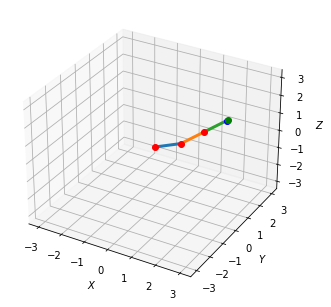

In [29]:
fig = plt.figure()
        # camera = Camera(fig)
axis = plt.axes(projection='3d')
axis = Axes3D(fig)
axis.set_xlim3d(-3.3, 3.3)
axis.set_ylim3d(-3.3, 3.3)
axis.set_zlim3d(-3.3, 3.3)
axis.set_xlabel('$X$')
axis.set_ylabel('$Y$')
axis.set_zlabel('$Z$')
# axis.set_title("3D simulation")

line1, = axis.plot([x1,x2], [y1,y2],[z1,z2], lw = 3)  
line2, = axis.plot([x2,x3], [y2,y3],[z2,z3], lw = 3)  
line3, = axis.plot([x3,x4], [y3,y4],[z3,z4], lw = 3)  
po, = axis.plot(x1,y1,z1,'ro')
p1, = axis.plot(x2,y2,z2,'ro')
p2, = axis.plot(x3,y3,z3,'ro')
p3, = axis.plot(x4,y4,z4,'bo')
pg, = axis.plot(2,2,1,'go')

# Dynamics 

for study of dynamics


In [30]:
T0c1 = helper.sym_transform(Length_link_1/2,0,0,theta1).evalf()
T2c2 =  helper.sym_transform(Length_link_2/2 , 0,0,0).evalf()
T0c2 = T02 * T2c2
T3c3 = helper.sym_transform(Length_link_3/2 , 0,0,0).evalf()
T0c3 = T03 * T3c3

In [31]:
Jv1 = sy.Matrix([
    [sy.diff(T0c1[0,-1],theta1),sy.diff(T0c1[1,-1],theta1),sy.diff(T0c1[2,-1],theta1)],
    [0,0,0],[0,0,0]
])

Jv2 = sy.Matrix([
    [sy.diff(T0c2[0,-1],theta1),sy.diff(T0c2[1,-1],theta1),sy.diff(T0c2[2,-1],theta1)],
    [sy.diff(T0c2[0,-1],theta2),sy.diff(T0c2[1,-1],theta2),sy.diff(T0c2[2,-1],theta2)],
    [0,0,0]
])

Jv3 = sy.Matrix([
    [sy.diff(T0c3[0,-1],theta1),sy.diff(T0c3[1,-1],theta1),sy.diff(T0c3[2,-1],theta1)],
    [sy.diff(T0c3[0,-1],theta2),sy.diff(T0c3[1,-1],theta2),sy.diff(T0c3[2,-1],theta2)],
    [sy.diff(T0c3[0,-1],theta3),sy.diff(T0c3[1,-1],theta3),sy.diff(T0c3[2,-1],theta3)]
])

In [32]:
Jw1 = sy.Matrix([[0,0,1],[0,0,0],[0,0,0]])
Jw2 = sy.Matrix([[0,0,1],[0,1,0],[0,0,0]])
Jw3 = sy.Matrix([[0,0,1],[0,1,0],[1,0,0]])

In [33]:
Ic1 = mass/12 * sy.Matrix([[2*h**2 ,0,0],
    [0 ,Length_link_1**2+h*h,0],
    [0,0,Length_link_1*Length_link_1+h*h]])
Ic2 = mass/12 * sy.Matrix([[2*h**2 ,0,0],
    [0 ,Length_link_1**2+h*h,0],
    [0,0,Length_link_1*Length_link_1+h*h]])
Ic3 = mass/12 * sy.Matrix([[2*h**2 ,0,0],
    [0 ,Length_link_1**2+h*h,0],
    [0,0,Length_link_1*Length_link_1+h*h]])

In [34]:
mass_matrix = (Jv1.T * Jv1)*mass + mass*Jv2.T*Jv2 + mass*Jv3.T*Jv3 + Jw1*Ic1*Jw1.T + Jw2*Ic2*Jw2.T + Jw3*Ic3*Jw3.T

In [39]:
def m_h(i,j,k):
    if k == 1:
        return sy.diff(mass_matrix[i-1,j-1],theta1)
    if k == 2:
        return sy.diff(mass_matrix[i-1,j-1],theta2)
    if k == 3:
        return sy.diff(mass_matrix[i-1,j-1],theta3)
    
def b_h(i,j,k):
    return 0.5*(m_h(i,j,k) + m_h(i,k,j) - m_h(j,k,i))

In [40]:
C = sy.Matrix([
    [b_h(1,1,1),b_h(1,2,2),b_h(1,3,3)],
    [b_h(2,1,1),b_h(2,2,2),b_h(2,3,3)],
    [b_h(3,1,1),b_h(3,2,2),b_h(3,3,3)]
])


In [41]:
B = 2*sy.Matrix([
    [b_h(1,1,2),b_h(1,1,3),b_h(1,2,3)],
    [b_h(2,1,2),b_h(2,1,3),b_h(2,2,3)],
    [b_h(3,1,2),b_h(3,1,3),b_h(3,2,3)]
])

In [45]:
g_vect = sy.Matrix([ [0] ,[0],[-1*g]])

In [46]:
G = -1*( Jv1.T*mass*g_vect + Jv2.T*mass*g_vect  + Jv3.T*mass*g_vect)

In [55]:
q_dot_dot = sy.Matrix([[t1_d_d,t2_d_d,t3_d_d]]).T
q_dot_2 = sy.Matrix([[t1_dot**2,t2_dot**2,t3_dot**2]]).T
q_q_dot = sy.Matrix([[t1_dot*t2_dot,t1_dot*t3_dot,t2_dot*t3_dot]]).T

In [56]:
Torque = mass_matrix*q_dot_dot + C*q_dot_2 + B*q_q_dot + G

In [57]:
Torque

Matrix([
[                               0.5*L3*g*m*(1.0*sin(theta1)*cos(theta3) - sin(theta3)*cos(theta1)*cos(theta2)) + thetadot1**2*(-0.25*L2**2*m*sin(theta1)*sin(theta2)**2*cos(theta1) + 0.125*L3**2*m*(1.0*sin(theta1)*cos(theta3) - sin(theta3)*cos(theta1)*cos(theta2))*(2*sin(theta1)*sin(theta3)*cos(theta2) + 2.0*cos(theta1)*cos(theta3)) + 0.5*m*(-1.0*L1*sin(theta1) - 0.5*L2*sin(theta1)*cos(theta2))*(-2.0*L1*cos(theta1) - 1.0*L2*cos(theta1)*cos(theta2)) + 0.5*m*(2.0*L2*sin(theta1)*sin(theta2) + L3*sin(theta1)*sin(theta2)*cos(theta3))*(-1.0*L2*sin(theta2)*cos(theta1) - 0.5*L3*sin(theta2)*cos(theta1)*cos(theta3)) + 0.5*m*(-1.0*L1*sin(theta1) - 1.0*L2*sin(theta1)*cos(theta2) + 0.5*L3*(-sin(theta1)*cos(theta2)*cos(theta3) + 1.0*sin(theta3)*cos(theta1)))*(-2.0*L1*cos(theta1) - 2.0*L2*cos(theta1)*cos(theta2) + L3*(-1.0*sin(theta1)*sin(theta3) - cos(theta1)*cos(theta2)*cos(theta3)))) + thetadot1*thetadot2*(0.5*L2**2*m*sin(theta2)*cos(theta1)**2*cos(theta2) + L2*m*(-1.0*L1*sin(theta1) - 0.5